In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.dtypes.to_frame()

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [6]:
df['balance'] = df['balance'].astype(float) 

In [7]:
#sanity check
df.dtypes.to_frame()

,0
age,int64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
contact,object
day,int64


In [10]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [9]:
#information about the data set
df.info(verbose=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 17 entries, age to Target
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [10]:
#identifying the duplicate values:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=45211, step=1)

In [20]:
df.values

array([[58, 'management', 'married', ..., 0, 'unknown', 'no'],
       [44, 'technician', 'single', ..., 0, 'unknown', 'no'],
       [33, 'entrepreneur', 'married', ..., 0, 'unknown', 'no'],
       ...,
       [72, 'retired', 'married', ..., 3, 'success', 'yes'],
       [57, 'blue-collar', 'married', ..., 0, 'unknown', 'no'],
       [37, 'entrepreneur', 'married', ..., 11, 'other', 'no']],
      dtype=object)

In [15]:
[i for i in df.columns if 'a' in i]

['age',
 'marital',
 'education',
 'default',
 'balance',
 'loan',
 'contact',
 'day',
 'duration',
 'campaign',
 'pdays',
 'Target']

In [16]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [17]:
df['age'].to_frame()


,age
0,58
1,44
2,33
3,47
4,33
...,...
45206,51
45207,71
45208,72
45209,57


In [18]:
df[['age','education']]

,age,education
0,58,tertiary
1,44,secondary
2,33,secondary
3,47,unknown
4,33,unknown
...,...,...
45206,51,tertiary
45207,71,primary
45208,72,secondary
45209,57,secondary


In [19]:
#IDENTIFYING THE SUB CLASSES INTO COLUMN
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [20]:
 round(df.job.value_counts()*100/len(df),2)

job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: count, dtype: float64

In [21]:
round(df.marital.value_counts()*100/len(df),2)

marital
married     60.19
single      28.29
divorced    11.52
Name: count, dtype: float64

In [22]:
round(df.job.value_counts(normalize = True)*100,2).to_frame()

,proportion
job,
blue-collar,21.53
management,20.92
technician,16.80
admin.,11.44
services,9.19
retired,5.01
self-employed,3.49
entrepreneur,3.29
unemployed,2.88


In [23]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [24]:
df[df['job'] == 'services']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
14,57,services,married,secondary,no,162.0,yes,no,unknown,5,may,174,1,-1,0,unknown,no
19,33,services,married,secondary,no,0.0,yes,no,unknown,5,may,54,1,-1,0,unknown,no
23,25,services,married,secondary,no,50.0,yes,no,unknown,5,may,342,1,-1,0,unknown,no
40,44,services,divorced,secondary,no,2586.0,yes,no,unknown,5,may,160,1,-1,0,unknown,no
59,46,services,married,primary,no,179.0,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,60,services,married,secondary,no,4428.0,no,no,cellular,9,nov,125,1,96,6,failure,no
45164,35,services,married,tertiary,no,4655.0,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45185,60,services,married,tertiary,no,4256.0,yes,no,cellular,16,nov,200,1,92,4,success,yes
45187,32,services,single,secondary,no,1168.0,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes


In [43]:
df[(df['job'] =='housemaid') & (df['marital'] == 'married') & (df['balance'] <0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
3725,44,housemaid,married,primary,yes,-972.0,yes,yes,unknown,16,may,114,2,-1,0,unknown,no
5018,43,housemaid,married,secondary,no,-177.0,yes,no,unknown,21,may,172,2,-1,0,unknown,no
5830,51,housemaid,married,secondary,yes,-1013.0,yes,no,unknown,26,may,664,1,-1,0,unknown,no
6151,39,housemaid,married,primary,no,-44.0,yes,no,unknown,27,may,228,1,-1,0,unknown,no
10624,36,housemaid,married,tertiary,yes,-1941.0,yes,no,unknown,16,jun,505,1,-1,0,unknown,no
12854,31,housemaid,married,unknown,yes,-6.0,no,yes,telephone,7,jul,94,2,-1,0,unknown,no
12861,44,housemaid,married,primary,no,-227.0,no,yes,cellular,7,jul,153,1,-1,0,unknown,no
12989,31,housemaid,married,primary,no,-367.0,yes,yes,telephone,7,jul,352,2,-1,0,unknown,no
13082,34,housemaid,married,secondary,no,-97.0,yes,yes,cellular,8,jul,119,2,-1,0,unknown,no
13430,34,housemaid,married,primary,no,-1.0,yes,no,cellular,9,jul,272,1,-1,0,unknown,no


In [44]:
df[df['job'].isin(['retired','student'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50,1,-1,0,unknown,no
15,51,retired,married,primary,no,229.0,yes,no,unknown,5,may,353,1,-1,0,unknown,no
18,60,retired,married,primary,no,60.0,yes,no,unknown,5,may,219,1,-1,0,unknown,no
24,40,retired,married,primary,no,0.0,yes,yes,unknown,5,may,181,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529.0,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,25,student,single,secondary,no,358.0,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [45]:
df[df['age'].between(30,50)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428.0,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475.0,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557.0,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45202,34,admin.,single,secondary,no,557.0,no,no,cellular,17,nov,224,1,-1,0,unknown,yes


In [25]:
df[df['job'].str.startswith('ma')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
21,56,management,married,tertiary,no,779.0,yes,no,unknown,5,may,164,1,-1,0,unknown,no
26,39,management,single,tertiary,no,255.0,yes,no,unknown,5,may,296,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,29,management,single,tertiary,no,765.0,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45194,59,management,married,tertiary,no,138.0,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45197,36,management,single,secondary,no,1511.0,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428.0,no,no,cellular,16,nov,333,2,-1,0,unknown,no


In [26]:
df[df['job'].str.endswith('an')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55,1,-1,0,unknown,no
12,53,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no
29,36,technician,single,secondary,no,265.0,yes,yes,unknown,5,may,348,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45179,34,technician,married,secondary,no,1026.0,no,no,cellular,12,nov,319,1,100,6,failure,no
45182,34,technician,married,secondary,no,133.0,no,no,cellular,15,nov,401,2,187,5,success,yes
45200,38,technician,married,secondary,no,557.0,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [27]:
df[df['education'].str.contains('ia')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5,may,380,1,-1,0,unknown,no
21,56,management,married,tertiary,no,779.0,yes,no,unknown,5,may,164,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138.0,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45198,37,management,married,tertiary,no,1428.0,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583.0,no,no,cellular,17,nov,226,1,184,4,success,yes
45203,23,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


In [29]:
df.query('age < 50')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,38,technician,married,secondary,no,557.0,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45202,34,admin.,single,secondary,no,557.0,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [34]:
df.query ("age >50 and job =='technician' and balance > 10000")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
2576,51,technician,married,secondary,no,12061.0,yes,no,unknown,13,may,332,1,-1,0,unknown,no
7229,52,technician,married,secondary,no,22755.0,yes,no,unknown,29,may,70,2,-1,0,unknown,no
7865,57,technician,married,secondary,no,16063.0,yes,no,unknown,30,may,352,3,-1,0,unknown,no
8349,60,technician,divorced,secondary,no,11615.0,yes,no,unknown,3,jun,70,10,-1,0,unknown,no
8700,51,technician,single,tertiary,no,11222.0,yes,no,unknown,3,jun,151,7,-1,0,unknown,no
10173,51,technician,married,secondary,no,13089.0,no,no,unknown,11,jun,247,1,-1,0,unknown,no
11808,57,technician,married,tertiary,no,27069.0,no,yes,unknown,20,jun,174,3,-1,0,unknown,no
24465,51,technician,single,secondary,no,17092.0,no,no,cellular,17,nov,35,1,-1,0,unknown,no
24535,51,technician,married,secondary,no,12061.0,yes,no,cellular,17,nov,150,1,188,1,failure,no
25324,56,technician,single,tertiary,no,12539.0,no,no,cellular,18,nov,259,1,-1,0,unknown,no


In [44]:
df.where(df['job'] == 'technician').dropna()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55.0,1.0,-1.0,0.0,unknown,no
12,53.0,technician,married,secondary,no,6.0,yes,no,unknown,5.0,may,517.0,1.0,-1.0,0.0,unknown,no
13,58.0,technician,married,unknown,no,71.0,yes,no,unknown,5.0,may,71.0,1.0,-1.0,0.0,unknown,no
29,36.0,technician,single,secondary,no,265.0,yes,yes,unknown,5.0,may,348.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45179,34.0,technician,married,secondary,no,1026.0,no,no,cellular,12.0,nov,319.0,1.0,100.0,6.0,failure,no
45182,34.0,technician,married,secondary,no,133.0,no,no,cellular,15.0,nov,401.0,2.0,187.0,5.0,success,yes
45200,38.0,technician,married,secondary,no,557.0,yes,no,cellular,16.0,nov,1556.0,4.0,-1.0,0.0,unknown,yes
45205,25.0,technician,single,secondary,no,505.0,no,yes,cellular,17.0,nov,386.0,2.0,-1.0,0.0,unknown,yes


<Axes: ylabel='proportion'>

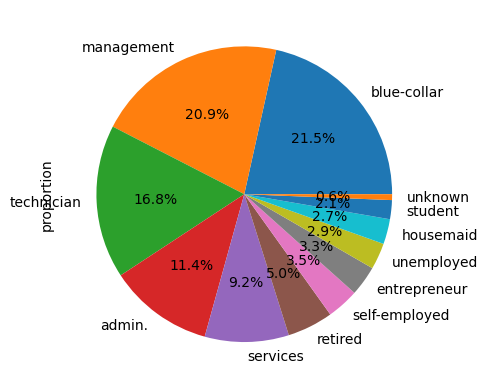

In [14]:
df.job.value_counts(normalize = True).plot(kind='pie',autopct ='%1.1f%%')  

<Axes: ylabel='job'>

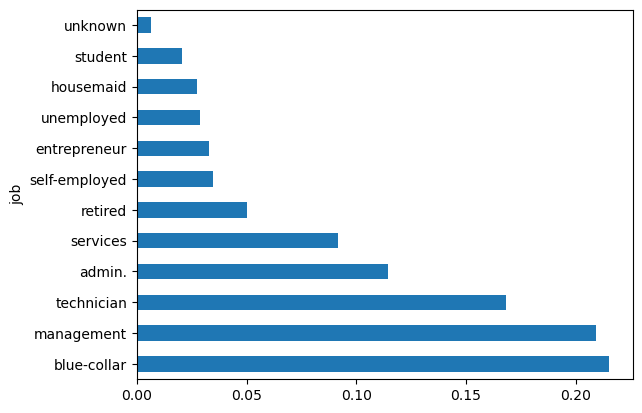

In [15]:
df.job.value_counts(normalize = True).plot(kind='barh')

<Axes: xlabel='job'>

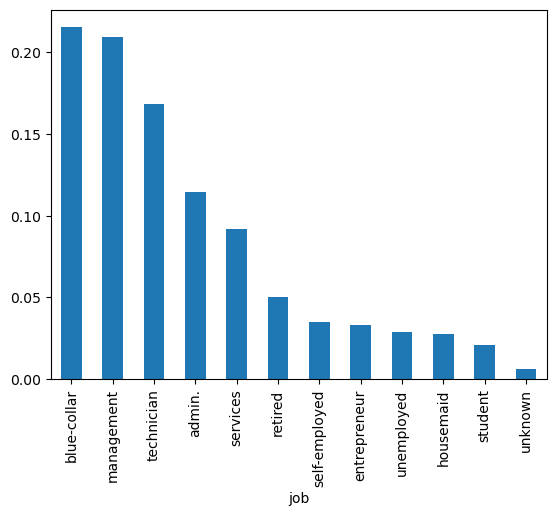

In [16]:
df.job.value_counts(normalize = True).plot(kind='bar')

In [17]:
 df.where(df['balance'] < 10000).dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no
